In [13]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

## Stałe pomocnicze



In [14]:

DATASET_NAME = "data_processed_balanced_125k"

# Importy


In [15]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Import danych


In [16]:
data = pd.read_csv(os.path.join(os.getcwd(), f"../../data/processed/{DATASET_NAME}.csv"))
data.head()

,text,rating
0,We got tricked by the name Wyndham attached to...,0
1,"Very nice view indeed for this hotel, and pret...",0
2,We blocked out 10 rooms for a wedding and I ca...,0
3,I normally don't bother with reviews but this ...,0
4,stayed in this hotel last year at easter it wa...,0


# Analiza danych

In [17]:
print(f"shape: {data.shape}")
data.info()

shape: (125000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    125000 non-null  object
 1   rating  125000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


Mamy do czynienia ze zbiorem 125 tysięcy rekordów, rekordy składają się z opinii tekstowej oraz oceny dyskretnej w skali 0-4. Każda z klas oceny oznacza liczbę gwiazdek którą otrzymał hotel. Wliczenie liczby gwiazdek połączonej do danej opinii tekstowej liczymy ze wzoru wartość + 1. Czyli na przykład opinia o klasie z wartością 4 oznacza opinię pięciogwiazdkową.

In [18]:
# show how many duplicates there are

duplicates = data.duplicated().sum()
print(f"duplicates: {duplicates}")

# show how many times each dupicate is repeated
duplicates = data[data.duplicated(keep=False)].sort_values(by=list(data.columns))
duplicates['count'] = 1
duplicates = duplicates.groupby(list(data.columns)).count()
duplicates = duplicates[duplicates['count'] > 1]
duplicates.sort_values(by='count', ascending=False)



duplicates: 0


,,count
text,rating,


In [19]:
data.duplicated().sum()

0

W preprocesowanym datasecie nie wykryto duplikatów

## Zbiór zbalansowany

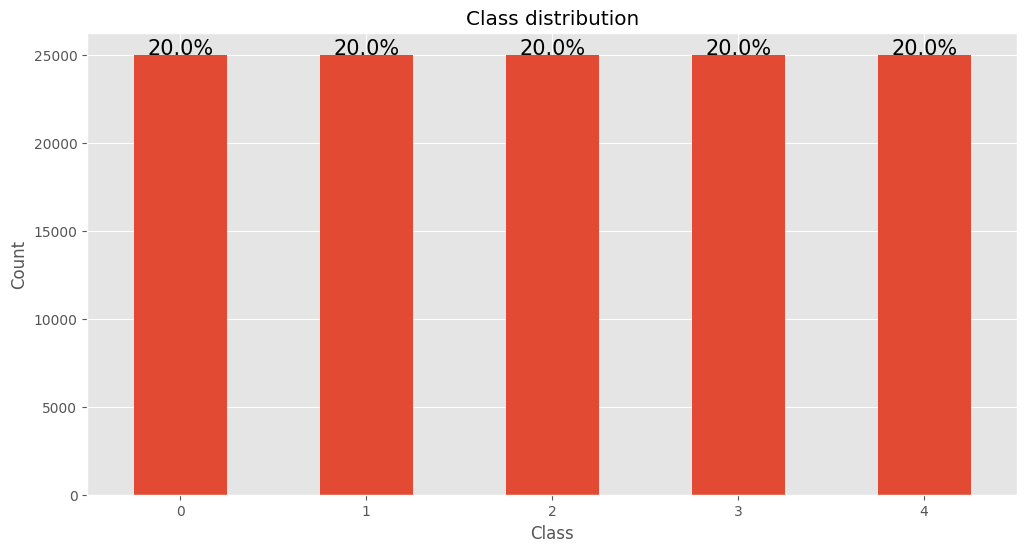

In [20]:

# plot the distribution of the class attribute

data['rating'].value_counts().plot(kind='bar', title='Class distribution', xlabel='Class', ylabel='Count', rot=0)

## add a procentage value that shows on the top of each bar

for i in range(5):
    plt.text(i, data['rating'].value_counts()[4-i], f"{round(data['rating'].value_counts(normalize=True)[4-i]*100, 2)}%", ha='center', size=15)


## Wnioski

Zbiór jest zbalanoswany, w każdej z klas jest po 25 tysięcy rekordów.